In [1]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

In [2]:
X = np.array(pickle.load(open("X.pickle", "rb")))
y = np.array(pickle.load(open("y.pickle", "rb")))
 

In [5]:
X=X/255

In [10]:
model = Sequential()
InputShape = X.shape[1:]
model.add(Conv2D(32,(3,3),input_shape = InputShape,activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Dense(15, activation = 'softmax'))



model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 64)       

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
history = model.fit(X,y, batch_size = 16, epochs = 15, validation_split = 0.1)
modelFile = model.to_json()
file = open("model.json", "w")
file.write(modelFile)
file.close()
model.save_weights("model.h5")
print("Saved model to disk")
model.save('CNN.model')



Train on 18574 samples, validate on 2064 samples
Epoch 1/15
18574/18574 [==============================] - 58s 3ms/sample - loss: 1.0034 - accuracy: 0.6818 - val_loss: 0.7543 - val_accuracy: 0.7359
Epoch 2/15
18574/18574 [==============================] - 57s 3ms/sample - loss: 0.4638 - accuracy: 0.8481 - val_loss: 0.4243 - val_accuracy: 0.8585
Epoch 3/15
18574/18574 [==============================] - 81s 4ms/sample - loss: 0.3089 - accuracy: 0.8959 - val_loss: 0.5672 - val_accuracy: 0.8018
Epoch 4/15
18574/18574 [==============================] - 71s 4ms/sample - loss: 0.2132 - accuracy: 0.9274 - val_loss: 0.5430 - val_accuracy: 0.8091
Epoch 5/15
18574/18574 [==============================] - 74s 4ms/sample - loss: 0.1644 - accuracy: 0.9449 - val_loss: 0.4414 - val_accuracy: 0.8605
Epoch 6/15
18574/18574 [==============================] - 72s 4ms/sample - loss: 0.1369 - accuracy: 0.9567 - val_loss: 0.5316 - val_accuracy: 0.8382
Epoch 7/15
18574/18574 [==============================] -

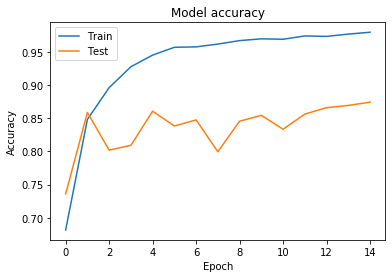

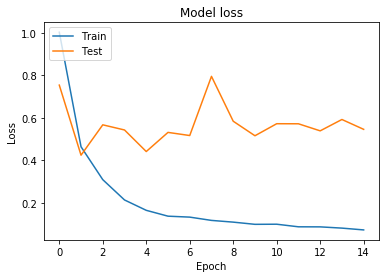

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
